In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Gather

In [26]:
import os

files_lst = os.listdir("data")
files_lst[:5]

['2015-01-city-of-london-street.csv',
 '2015-01-greater-manchester-street.csv',
 '2015-02-city-of-london-street.csv',
 '2015-02-greater-manchester-street.csv',
 '2015-03-city-of-london-street.csv']

In [27]:

data = pd.DataFrame()
for file_name in files_lst:
    file_data = pd.read_csv("data/" + file_name, encoding="cp1252")
    data = data.append(file_data, ignore_index=True)

data.head()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
0,80e07583f4bd74b85e457d92eef5d014e4e8d7b0eab0dc...,2015-01,City of London Police,City of London Police,-0.106453,51.518207,On or near Charterhouse Street,E01000916,Camden 027B,Bicycle theft,Unable to prosecute suspect,NaN
1,e6dc6a4a33ed886c7c72beaff0c5de92cc35cd2f76c6e5...,2015-01,City of London Police,City of London Police,-0.111497,51.518226,On or near Pedestrian Subway,E01000914,Camden 028B,Burglary,Unable to prosecute suspect,NaN
2,6589894ebc515f501527628eb650d52a6f031116eb0ada...,2015-01,City of London Police,City of London Police,-0.111497,51.518226,On or near Pedestrian Subway,E01000914,Camden 028B,Burglary,Investigation complete; no suspect identified,NaN
3,b6e6462d45d0d7f4258d57628cab4c8988dc41ac675b63...,2015-01,City of London Police,City of London Police,-0.111497,51.518226,On or near Pedestrian Subway,E01000914,Camden 028B,Other theft,Investigation complete; no suspect identified,NaN
4,769e1aa86e62b5f3c4c08c8c140147a275ca721d0801ba...,2015-01,City of London Police,City of London Police,-0.113767,51.517372,On or near Stone Buildings,E01000914,Camden 028B,Theft from the person,Investigation complete; no suspect identified,NaN


## Data Wrangling

In [28]:
data.shape

(1743304, 12)

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1743304 entries, 0 to 1743303
Data columns (total 12 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Crime ID               object 
 1   Month                  object 
 2   Reported by            object 
 3   Falls within           object 
 4   Longitude              float64
 5   Latitude               float64
 6   Location               object 
 7   LSOA code              object 
 8   LSOA name              object 
 9   Crime type             object 
 10  Last outcome category  object 
 11  Context                float64
dtypes: float64(3), object(9)
memory usage: 159.6+ MB


In [30]:
data.isnull().sum()

Crime ID                  425806
Month                          0
Reported by                    0
Falls within                   0
Longitude                   2208
Latitude                    2208
Location                       0
LSOA code                   2208
LSOA name                   2208
Crime type                     0
Last outcome category     425806
Context                  1743304
dtype: int64

In [31]:
mask = data["Last outcome category"].isnull() & data["LSOA name"].isnull()
data[mask].shape

(106, 12)

In [32]:
data.duplicated().sum()

136229

In [33]:
data.describe()

,Longitude,Latitude,Context
count,1.741096e+06,1.741096e+06,0.0
mean,-2.224209e+00,5.346054e+01,NaN
std,3.445839e-01,2.915720e-01,NaN
min,-2.719327e+00,5.125294e+01,NaN
25%,-2.341732e+00,5.345461e+01,NaN
50%,-2.237738e+00,5.349628e+01,NaN
75%,-2.158428e+00,5.354772e+01,NaN
max,6.528380e-01,5.367315e+01,NaN


In [34]:
mask = data.Longitude > -2.2
data[mask].shape

(641578, 12)

In [35]:
data[mask].describe()

,Longitude,Latitude,Context
count,641578.000000,641578.000000,0.0
mean,-2.016197,53.389093,NaN
std,0.474874,0.464941,NaN
min,-2.199985,51.252939,NaN
25%,-2.165493,53.442525,NaN
50%,-2.133276,53.491423,NaN
75%,-2.093402,53.545303,NaN
max,0.652838,53.673146,NaN


Text(0, 0.5, 'Count')

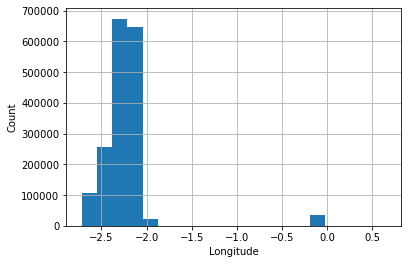

In [36]:
data.Longitude.hist(bins=20, )
plt.xlabel("Longitude")
plt.ylabel("Count")

Text(0, 0.5, 'Count(log)')

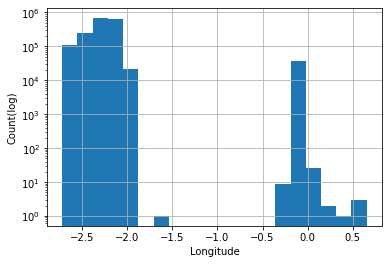

In [37]:
data.Longitude.hist(bins=20, )
plt.yscale("log")
plt.xlabel("Longitude")
plt.ylabel("Count(log)")

In [38]:
data.Month.value_counts()

2017-07    38046
2017-06    37003
2017-10    36656
2017-05    36395
2017-08    36326
2018-05    36158
2018-07    36100
2017-03    35809
2017-04    35504
2016-10    35317
2018-06    35115
2019-03    34815
2018-04    34783
2017-11    34706
2018-03    34141
2019-05    34097
2018-10    33620
2019-04    33554
2018-11    33471
2017-09    33343
2019-06    32980
2018-08    32899
2016-12    32725
2018-01    32472
2017-01    32153
2017-12    31884
2016-07    31791
2016-11    31756
2016-09    31712
2019-01    31680
2018-09    31619
2016-08    31440
2015-10    31406
2017-02    31381
2016-05    31180
2018-12    31137
2015-08    30904
2015-07    30903
2019-02    30805
2015-06    30616
2016-06    30611
2015-04    30375
2015-05    30342
2018-02    30192
2016-03    29015
2015-09    28997
2015-03    28779
2016-04    28770
2015-11    28651
2015-12    27767
2016-01    27453
2016-02    26931
2015-02    25904
2015-01    25751
2019-11      933
2019-10      929
2019-08      901
2019-12      882
2019-07      8

In [39]:
data["Reported by"].value_counts()

Greater Manchester Police    1704643
City of London Police          38661
Name: Reported by, dtype: int64

In [40]:
data["Falls within"].value_counts()

Greater Manchester Police    1704643
City of London Police          38661
Name: Falls within, dtype: int64

In [41]:
data["Location"].value_counts()

On or near Parking Area          50521
On or near Shopping Area         39638
On or near Supermarket           38480
On or near Petrol Station        22971
On or near Nightclub             20052
                                 ...  
On or near Preesall Close            1
On or near Dearden Clough            1
On or near Greenfinch Gardens        1
On or near Ainsworth Avenue          1
On or near Pennine Square            1
Name: Location, Length: 24971, dtype: int64

In [42]:
mask = ~(data["Location"].str.startswith("On or near"))
data.loc[mask, "Location"]

502        No Location
503        No Location
504        No Location
505        No Location
506        No Location
              ...     
1743299    No Location
1743300    No Location
1743301    No Location
1743302    No Location
1743303    No Location
Name: Location, Length: 2208, dtype: object

In [43]:
data["LSOA code"].value_counts()

E01033653    31835
E01033658    31824
E01032739    23955
E01033677    12693
E01005482    11628
             ...  
E01033706        1
E01002739        1
E01004295        1
E01032583        1
E01004214        1
Name: LSOA code, Length: 1819, dtype: int64

In [44]:
data["LSOA name"].value_counts()

Manchester 055B                31835
Manchester 054C                31824
City of London 001F            23955
Manchester 060A                12693
Rochdale 010C                  11628
                               ...  
Southwark 002E                     1
Tower Hamlets 022C                 1
Hackney 026A                       1
Tower Hamlets 026C                 1
Kensington and Chelsea 004D        1
Name: LSOA name, Length: 1819, dtype: int64

In [45]:
data["Crime type"].value_counts()

Anti-social behaviour           425806
Violence and sexual offences    391368
Criminal damage and arson       165905
Public order                    146920
Burglary                        135909
Vehicle crime                   127580
Other theft                     123891
Shoplifting                      82413
Theft from the person            32587
Other crime                      27827
Robbery                          25619
Drugs                            25037
Bicycle theft                    20937
Possession of weapons            11505
Name: Crime type, dtype: int64

In [46]:
data["Last outcome category"].value_counts()

Investigation complete; no suspect identified          758595
Unable to prosecute suspect                            262014
Status update unavailable                               86523
Court result unavailable                                37298
Further investigation is not in the public interest     32193
Local resolution                                        31398
Under investigation                                     16809
Offender sent to prison                                 16587
Offender given a caution                                13262
Offender given community sentence                       12148
Formal action is not in the public interest              9919
Awaiting court outcome                                   9663
Defendant found not guilty                               6589
Offender given a drugs possession warning                5132
Offender given suspended prison sentence                 4257
Offender given conditional discharge                     3611
Offender

In [47]:
mask = data["LSOA name"].isnull()
data.loc[mask, "Crime type"].value_counts()

Violence and sexual offences    436
Other theft                     392
Theft from the person           377
Drugs                           208
Other crime                     168
Shoplifting                     151
Public order                    109
Anti-social behaviour           106
Burglary                         60
Bicycle theft                    52
Vehicle crime                    49
Criminal damage and arson        41
Robbery                          34
Possession of weapons            25
Name: Crime type, dtype: int64

In [48]:
data.columns

Index(['Crime ID', 'Month', 'Reported by', 'Falls within', 'Longitude',
       'Latitude', 'Location', 'LSOA code', 'LSOA name', 'Crime type',
       'Last outcome category', 'Context'],
      dtype='object')

### Assess:
- `Context` is an empty column
- Crimes with not No outcome has no Crime ID
- duplicated rows
- columns `Reported by` and `Falls within` reflects the same data
- At `Location` column, missing data are encoded as 'No Location'
- some rows has no location data
- `LSOA code` and `LSOA name` are duplicates


## Data Cleaning

### Clean & Test:
- drop columns `Context` (empty), `Reported by`, `LSOA code` (duplicated) and `Crime ID` (not useful in analysis)

In [49]:
data.drop(columns=["Context", "Reported by", "LSOA code", "Crime ID"], inplace=True)
data.head()

,Month,Falls within,Longitude,Latitude,Location,LSOA name,Crime type,Last outcome category
0,2015-01,City of London Police,-0.106453,51.518207,On or near Charterhouse Street,Camden 027B,Bicycle theft,Unable to prosecute suspect
1,2015-01,City of London Police,-0.111497,51.518226,On or near Pedestrian Subway,Camden 028B,Burglary,Unable to prosecute suspect
2,2015-01,City of London Police,-0.111497,51.518226,On or near Pedestrian Subway,Camden 028B,Burglary,Investigation complete; no suspect identified
3,2015-01,City of London Police,-0.111497,51.518226,On or near Pedestrian Subway,Camden 028B,Other theft,Investigation complete; no suspect identified
4,2015-01,City of London Police,-0.113767,51.517372,On or near Stone Buildings,Camden 028B,Theft from the person,Investigation complete; no suspect identified


### Clean & Test:
- drop duplicated rows

In [50]:
data.drop_duplicates(inplace=True)
data.duplicated().sum()

0

### Clean & Test:
- drop rows that have location or outcome data missing

In [51]:
mask = data["LSOA name"].isnull() | data["Last outcome category"].isnull()
data = data[~mask]
data.isnull().sum()

Month                    0
Falls within             0
Longitude                0
Latitude                 0
Location                 0
LSOA name                0
Crime type               0
Last outcome category    0
dtype: int64

### Clean & Test:
- separate year and month at `Month` column

In [52]:
data[["year", "month"]] = data["Month"].str.extract("(\d+)-(\d+)")
data.drop(columns="Month", inplace=True)
data.columns

Index(['Falls within', 'Longitude', 'Latitude', 'Location', 'LSOA name',
       'Crime type', 'Last outcome category', 'year', 'month'],
      dtype='object')

In [53]:
data["year"] = data["year"].astype(int)
data["month"] = data["month"].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1100116 entries, 0 to 1743224
Data columns (total 9 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Falls within           1100116 non-null  object 
 1   Longitude              1100116 non-null  float64
 2   Latitude               1100116 non-null  float64
 3   Location               1100116 non-null  object 
 4   LSOA name              1100116 non-null  object 
 5   Crime type             1100116 non-null  object 
 6   Last outcome category  1100116 non-null  object 
 7   year                   1100116 non-null  int32  
 8   month                  1100116 non-null  int32  
dtypes: float64(2), int32(2), object(5)
memory usage: 75.5+ MB


In [54]:
data.head()

,Falls within,Longitude,Latitude,Location,LSOA name,Crime type,Last outcome category,year,month
0,City of London Police,-0.106453,51.518207,On or near Charterhouse Street,Camden 027B,Bicycle theft,Unable to prosecute suspect,2015,1
1,City of London Police,-0.111497,51.518226,On or near Pedestrian Subway,Camden 028B,Burglary,Unable to prosecute suspect,2015,1
2,City of London Police,-0.111497,51.518226,On or near Pedestrian Subway,Camden 028B,Burglary,Investigation complete; no suspect identified,2015,1
3,City of London Police,-0.111497,51.518226,On or near Pedestrian Subway,Camden 028B,Other theft,Investigation complete; no suspect identified,2015,1
4,City of London Police,-0.113767,51.517372,On or near Stone Buildings,Camden 028B,Theft from the person,Investigation complete; no suspect identified,2015,1


### Clean & Test:
- remove the prefix 'On or near' from values of `Location` column

In [55]:
data["Location"] = data["Location"].str.replace("On or near ", "")
data.sample(10)

,Falls within,Longitude,Latitude,Location,LSOA name,Crime type,Last outcome category,year,month
886892,Greater Manchester Police,-2.350646,53.387542,Shopping Area,Trafford 025B,Other theft,Investigation complete; no suspect identified,2017,5
354434,Greater Manchester Police,-2.325282,53.560840,New Church Street,Bury 016D,Vehicle crime,Investigation complete; no suspect identified,2016,1
472107,Greater Manchester Police,-2.202158,53.441764,Fortuna Grove,Manchester 034F,Vehicle crime,Investigation complete; no suspect identified,2016,5
830417,Greater Manchester Police,-2.229950,53.416887,William Street,Manchester 043E,Violence and sexual offences,Awaiting court outcome,2017,4
1269900,City of London Police,-0.097277,51.515307,St Martin'S Le Grand,City of London 001A,Drugs,Offender sent to prison,2018,5
319508,Greater Manchester Police,-2.311307,53.392793,Merefield Road,Trafford 022B,Criminal damage and arson,Offender given conditional discharge,2015,11
852188,Greater Manchester Police,-2.491724,53.534744,Peak Avenue,Wigan 017B,Criminal damage and arson,Investigation complete; no suspect identified,2017,4
553483,Greater Manchester Police,-2.631254,53.547886,Shopping Area,Wigan 008C,Shoplifting,Local resolution,2016,7
1258986,Greater Manchester Police,-2.294082,53.489832,Petrol Station,Salford 023C,Public order,Investigation complete; no suspect identified,2018,4
1413159,Greater Manchester Police,-2.436126,53.566968,Peabody Street,Bolton 025C,Vehicle crime,Unable to prosecute suspect,2018,9


In [56]:
# save clean data
data.to_csv("clean_data.csv", index=False)

### Questions:
- Are there a particular crime type for crimes with missing location?
- Are we solving more crimes by years?
- Do We have consantration for crimes?
- Do the places of consantration changed over time ?


## Exploration Analysis

### Univariant Analysis

In [57]:
data.columns

Index(['Falls within', 'Longitude', 'Latitude', 'Location', 'LSOA name',
       'Crime type', 'Last outcome category', 'year', 'month'],
      dtype='object')

Text(0, 0.5, 'Count')

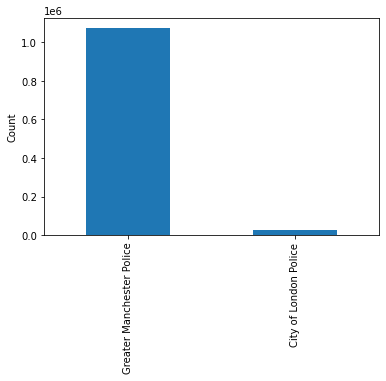

In [58]:
data['Falls within'].value_counts().plot.bar()
plt.ylabel("Count")

Text(0, 0.5, 'Count')

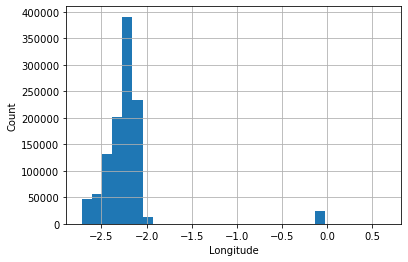

In [59]:
data['Longitude'].hist(bins=30)
plt.xlabel("Longitude")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

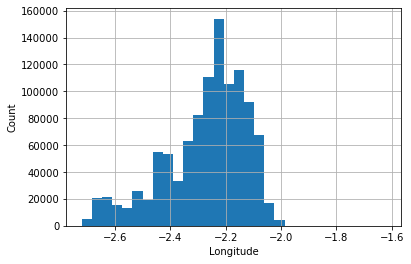

In [60]:
mask = data['Longitude'] < -1.5
data.loc[mask, "Longitude"].hist(bins=30)
plt.xlabel("Longitude")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

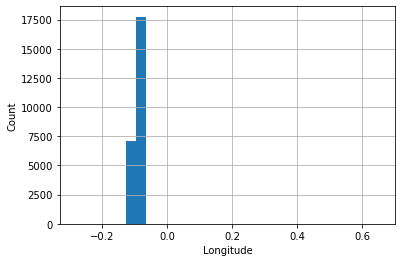

In [61]:
mask = data['Longitude'] > -0.5
data.loc[mask, "Longitude"].hist(bins=30)
plt.xlabel("Longitude")
plt.ylabel("Count")

> looks like there are concentration for crimes in specific range of coordinate

Text(0, 0.5, 'Count')

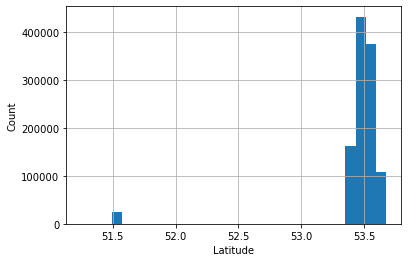

In [62]:
data['Latitude'].hist(bins=30)
plt.xlabel("Latitude")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

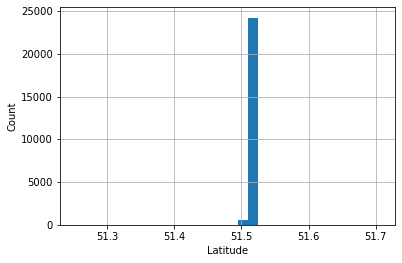

In [63]:
mask = data['Latitude'] < 52
data.loc[mask, "Latitude"].hist(bins=30)
plt.xlabel("Latitude")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

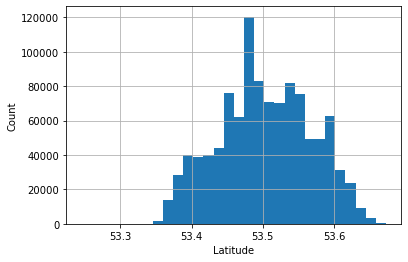

In [64]:
mask = data['Latitude'] > 53
data.loc[mask, "Latitude"].hist(bins=30)
plt.xlabel("Latitude")
plt.ylabel("Count")

> Latitude data is supporting the same conclusion of crime concentration

In [65]:
# sns.countplot(y=data['Location'])

In [66]:
data["Location"].value_counts().describe()

count    24842.000000
mean        44.284518
std        309.907504
min          1.000000
25%          8.000000
50%         19.000000
75%         42.000000
max      29000.000000
Name: Location, dtype: float64

Text(0, 0.5, 'Count')

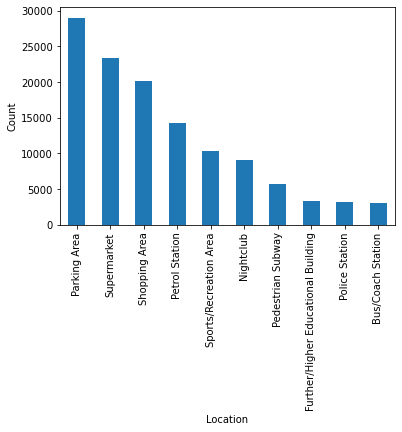

In [67]:
data["Location"].value_counts().head(10).plot.bar()
plt.xlabel("Location")
plt.ylabel("Count")

Text(0, 0.5, 'Percentage')

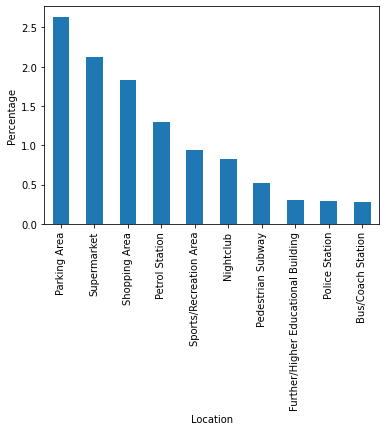

In [68]:
(data["Location"].value_counts() / data.shape[0] * 100).head(10).plot.bar()
plt.xlabel("Location")
plt.ylabel("Percentage")

In [69]:
(data["Location"].value_counts() / data.shape[0] * 100).head(10).sum()

11.050471041235651

In [70]:
data["Location"].nunique()

24842

> Location data is supporting the crime concentration assumption, as just 10 places out of 24,842 have 11% of the crimes

### Bivariant Analysis

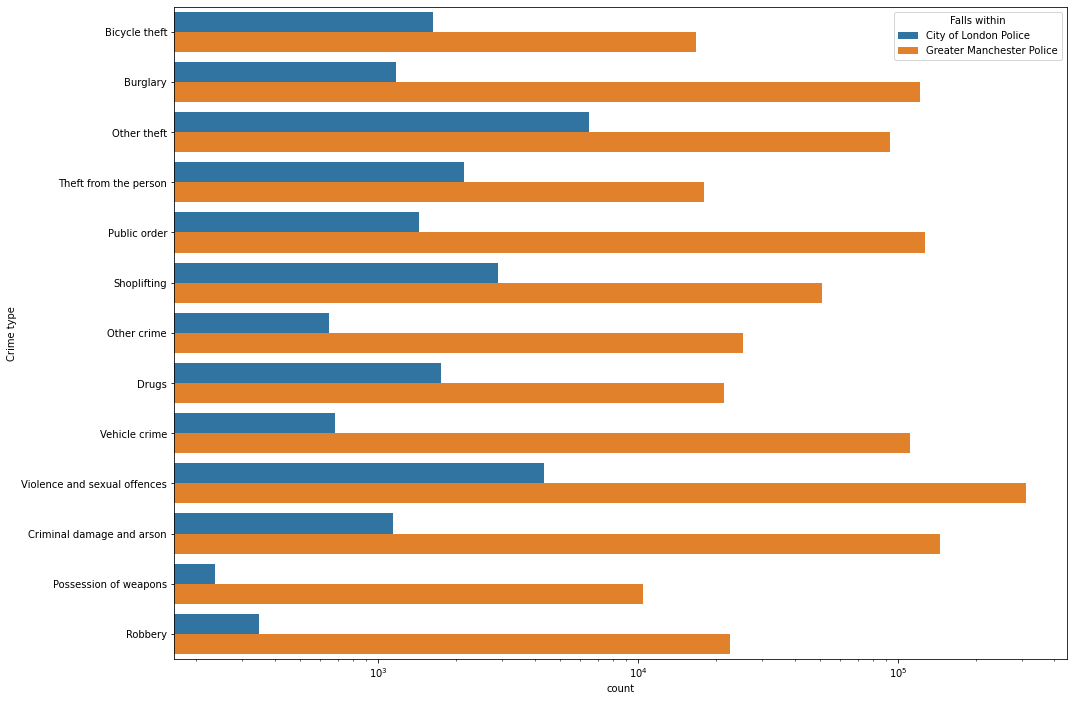

In [71]:
# Falls within vs Crime type
plt.figure(figsize=(16, 12))
sns.countplot(data=data, hue="Falls within", y="Crime type")
plt.xscale("log")

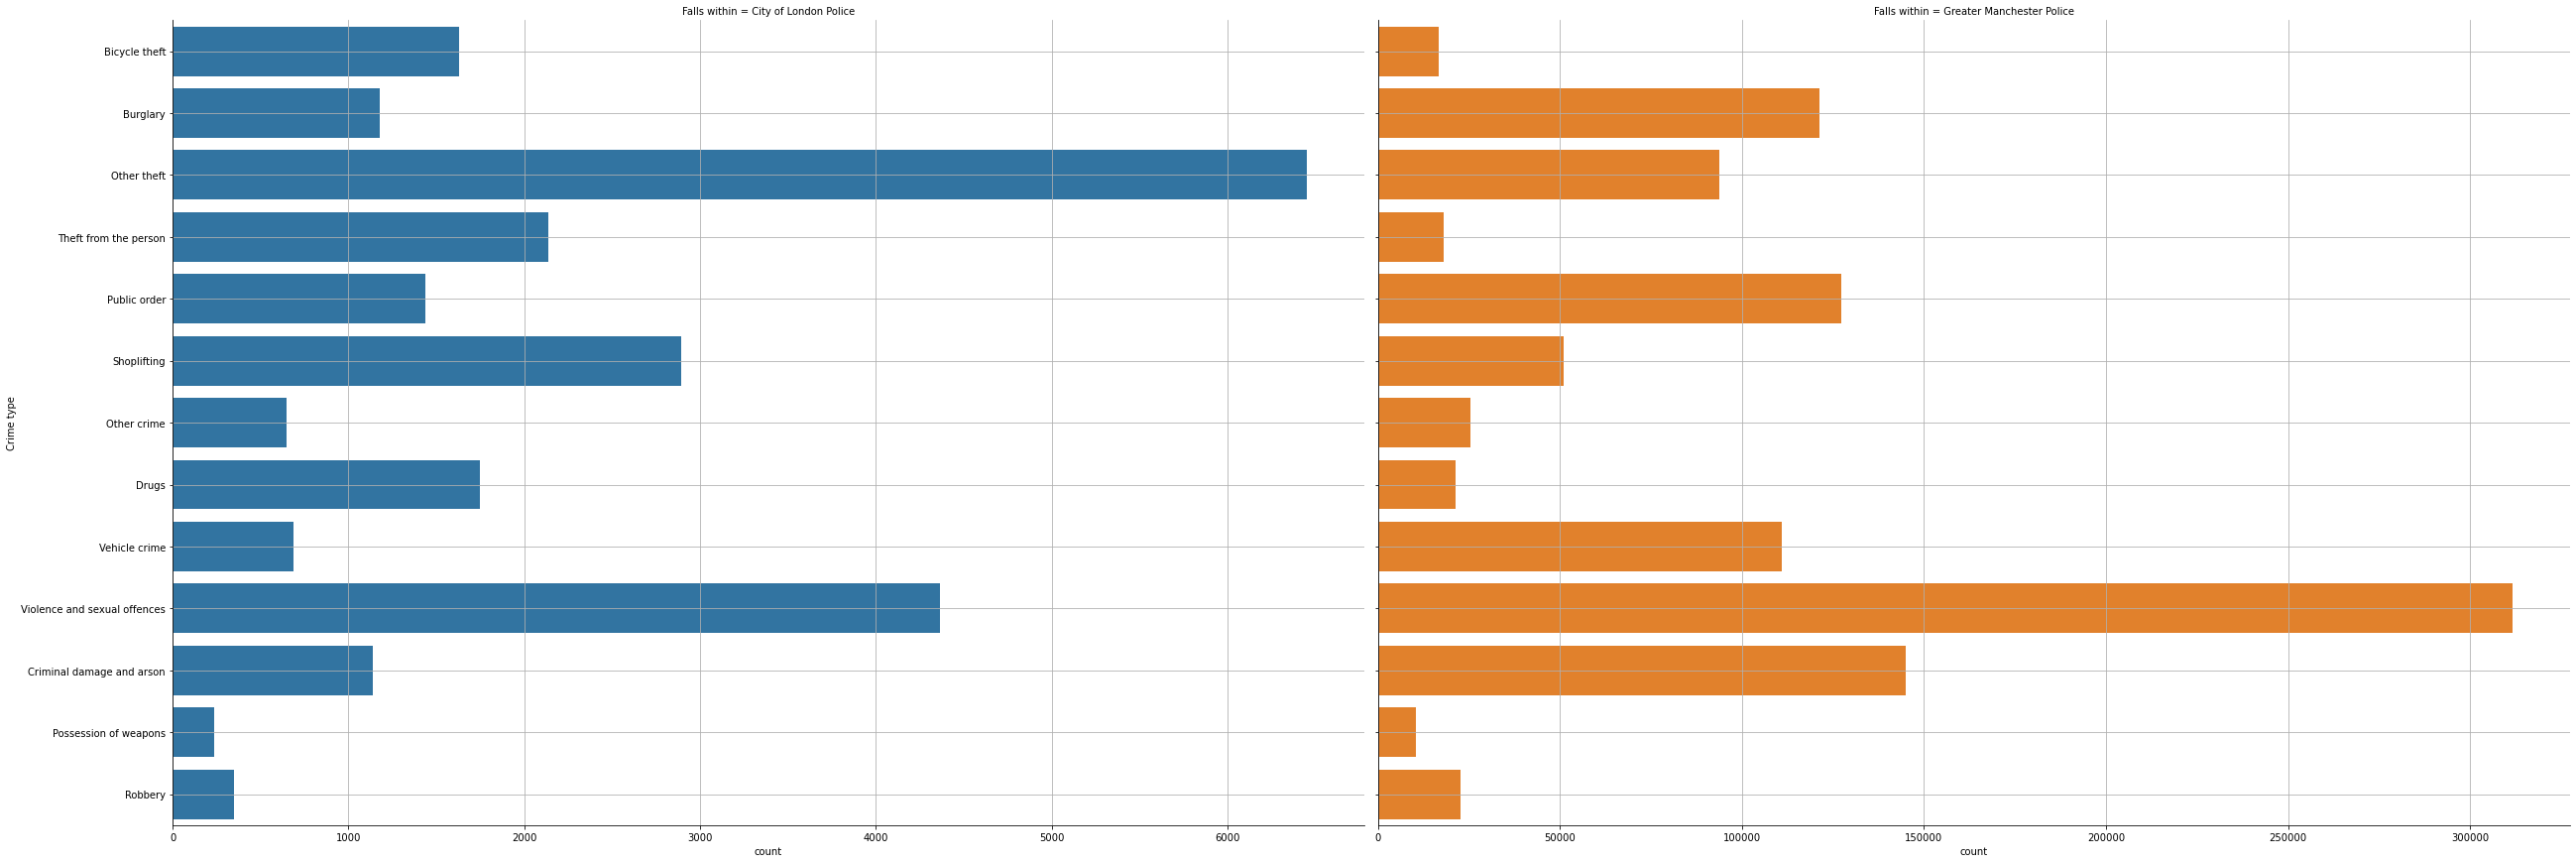

In [72]:
# Falls within vs Crime type
g = sns.catplot(data=data, y="Crime type", col='Falls within', hue="Falls within", sharex=False, kind="count", height=12, aspect=1.5, dodge=False)
for ax in g.axes.flat:
    ax.grid(True, axis='both')

> the crime type frequency is different between London and Manchester

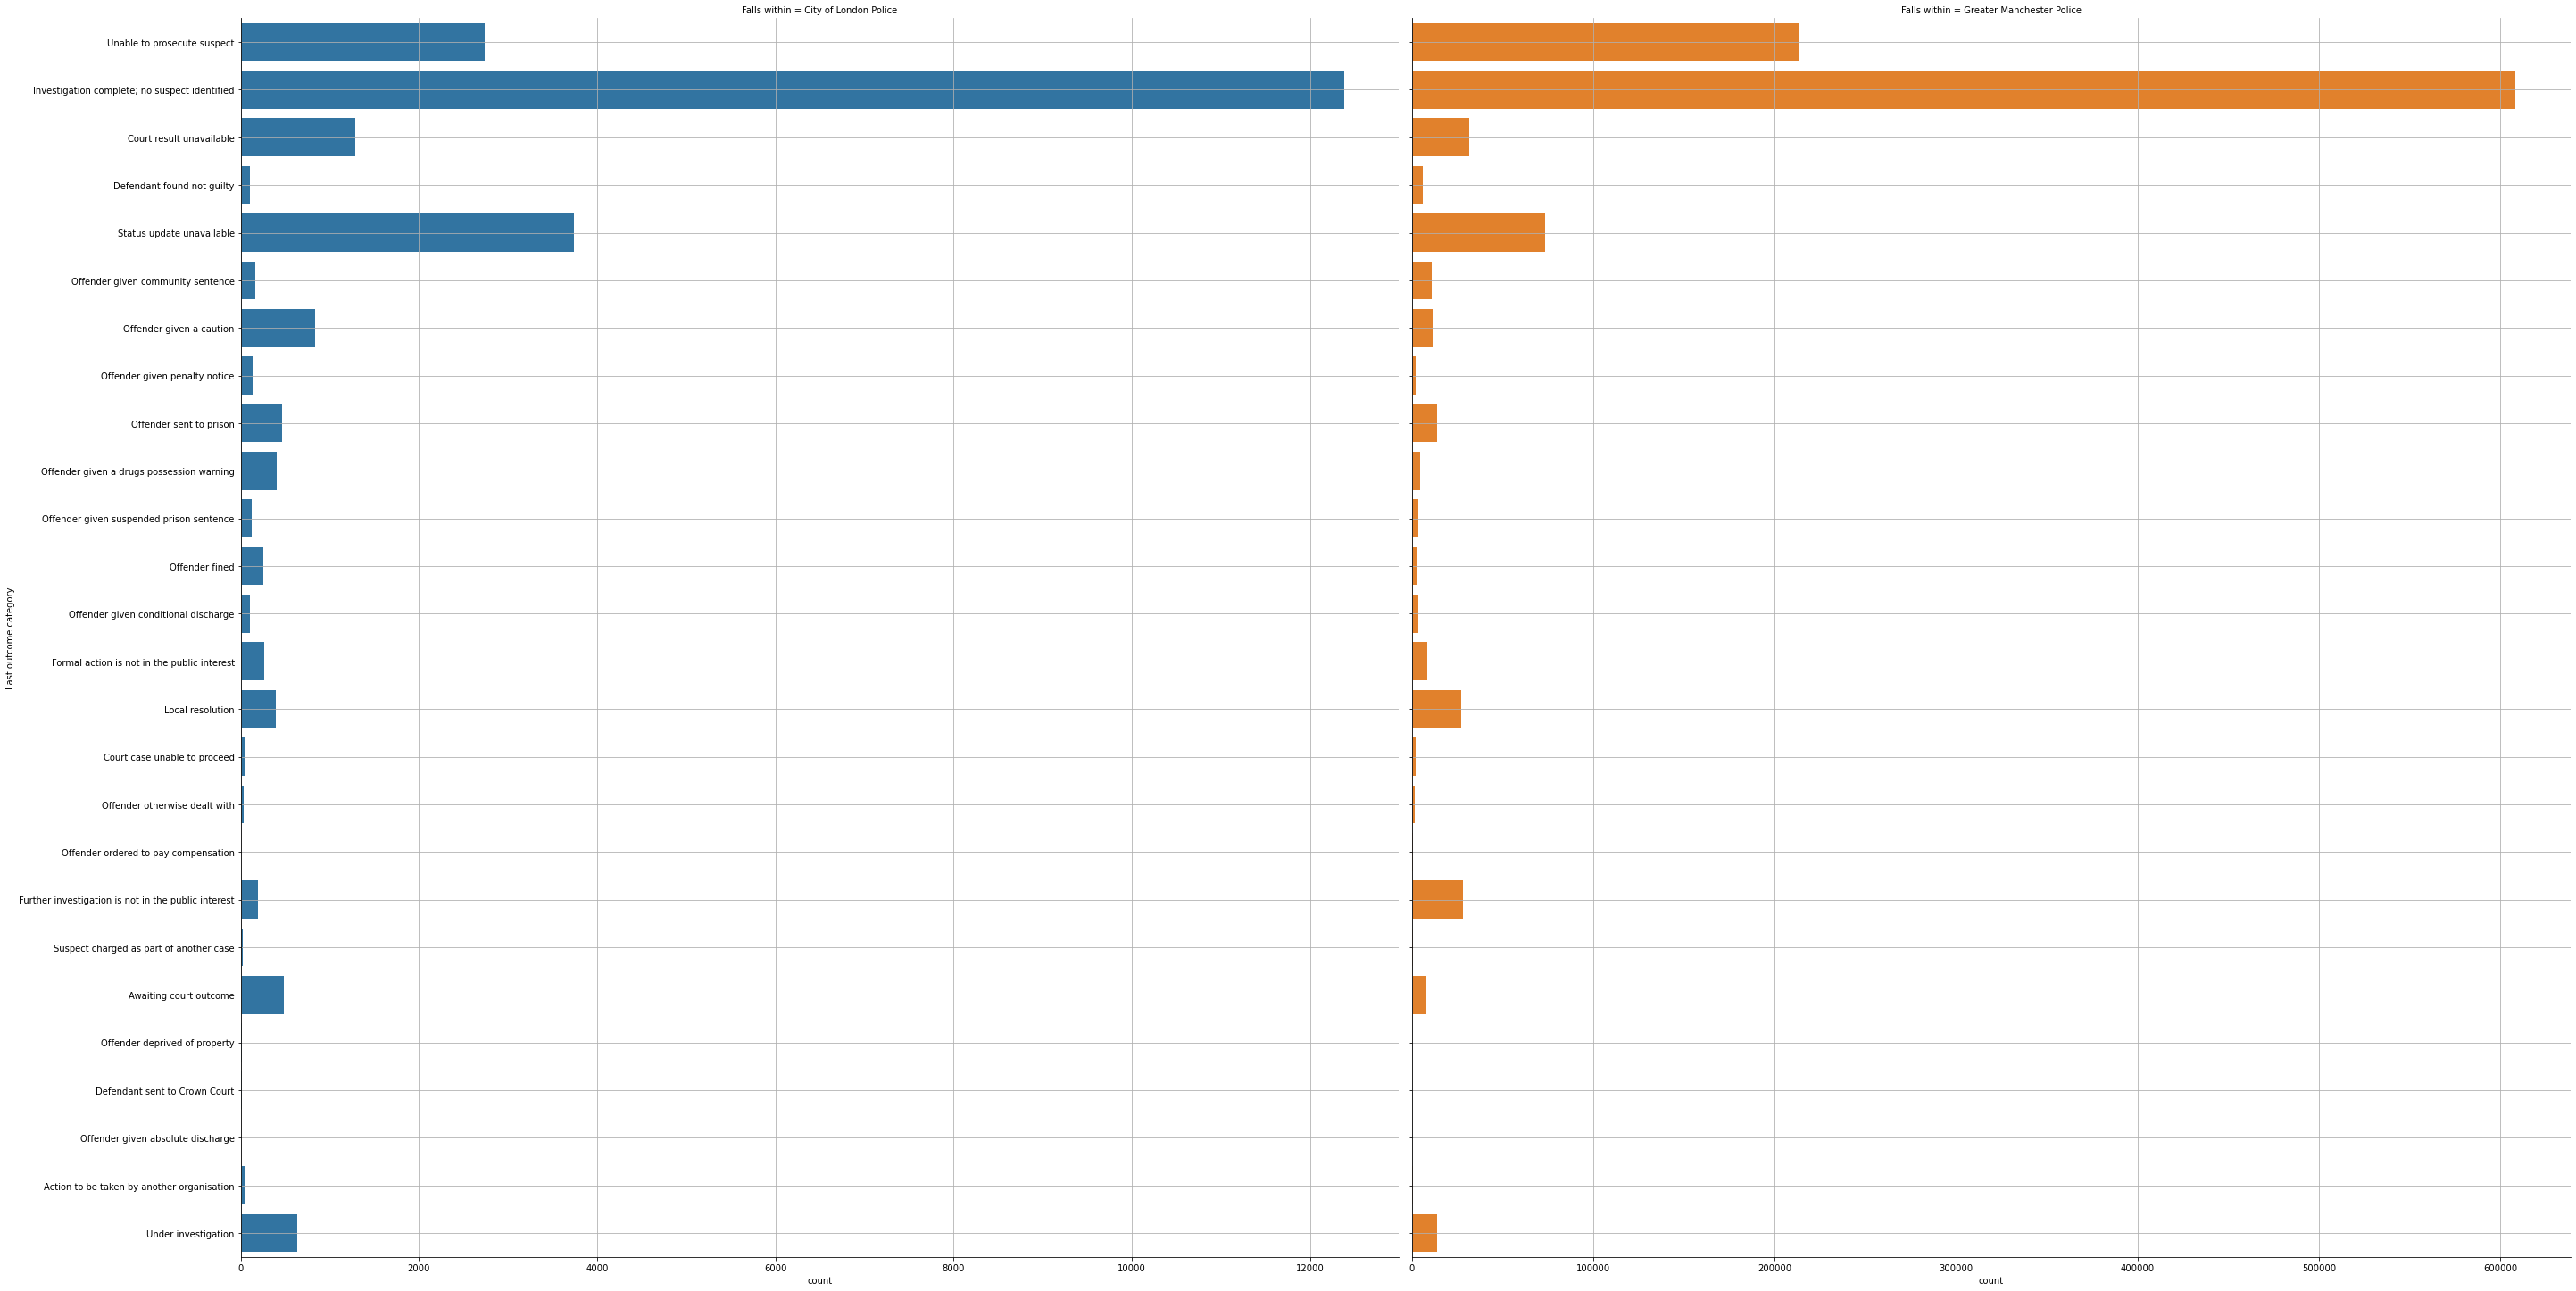

In [73]:
# Last outcome category vs. Falls within
g = sns.catplot(data=data, y="Last outcome category", col='Falls within', hue="Falls within", sharex=False, kind="count", height=20, dodge=False)
for ax in g.axes.flat:
    ax.grid(True, axis='both')

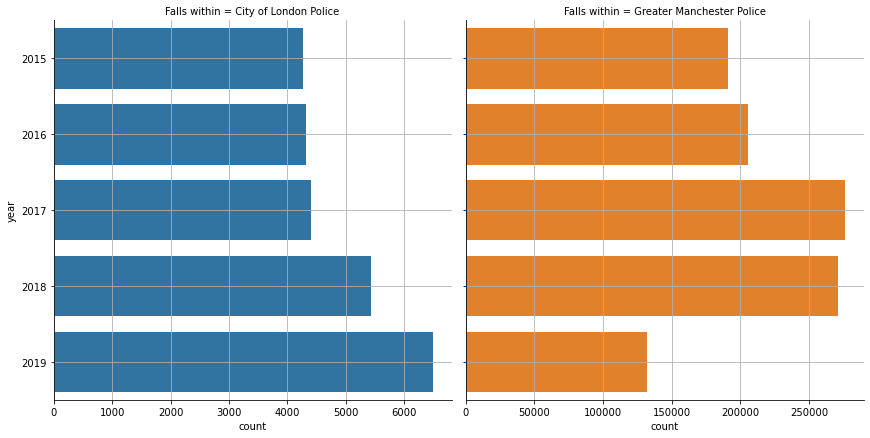

In [74]:
# year vs. Falls within 
g = sns.catplot(data=data, y="year", col='Falls within', hue="Falls within", sharex=False, kind="count", height=6, dodge=False)
for ax in g.axes.flat:
    ax.grid(True, axis='both')

> The peak for each city were in different years

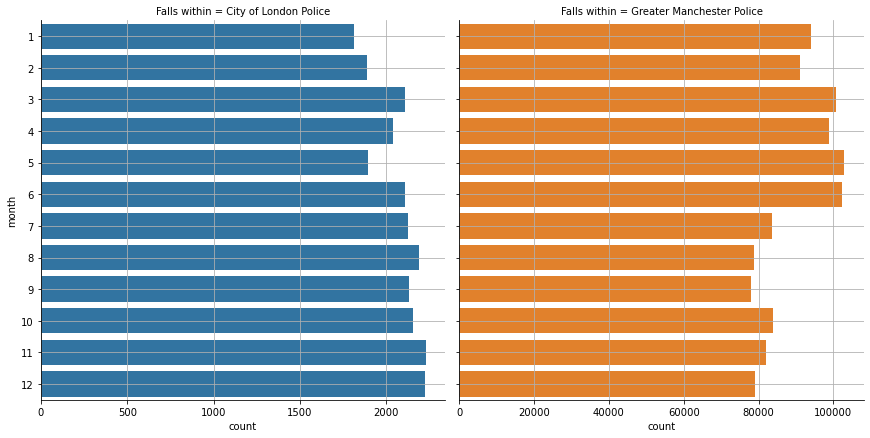

In [75]:
# month vs. Falls within 
g = sns.catplot(data=data, y="month", col='Falls within', hue="Falls within", sharex=False, kind="count", height=6, dodge=False)
for ax in g.axes.flat:
    ax.grid(True, axis='both')

> again the peak is different, in Manchester it's May and June, while it's November and December in London

In [76]:
# get the top 10 Locations with terms of crime counts for each 'Falls within'

def trim_groups(group):
    return group.head(10)

temp = data.groupby(["Falls within", "Location"]).size().sort_values(ascending=False).reset_index().groupby(["Falls within"]).apply(trim_groups).reset_index(drop=True).rename(columns={0: "count"})
temp

,Falls within,Location,count
0,City of London Police,Supermarket,906
1,City of London Police,Police Station,685
2,City of London Police,Pedestrian Subway,682
3,City of London Police,Parking Area,680
4,City of London Police,Nightclub,438
5,City of London Police,Conference/Exhibition Centre,420
6,City of London Police,Alderman'S Walk,418
7,City of London Police,Queen Victoria Street,387
8,City of London Police,Bell Inn Yard,371
9,City of London Police,St Martin'S Le Grand,355


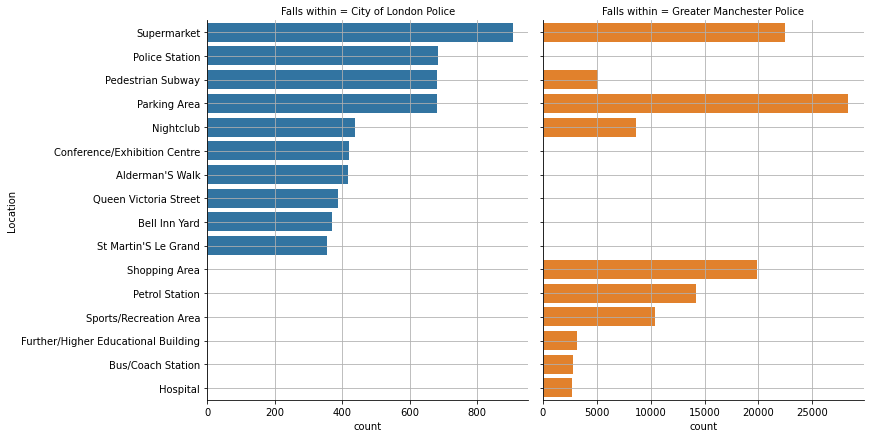

In [77]:
# Location vs. Falls within
g = sns.catplot(data=temp, y="Location", x="count", kind="bar", col='Falls within', hue="Falls within", sharex=False, height=6, dodge=False)
for ax in g.axes.flat:
    ax.grid(True, axis='both')

> We can say that highest crime frequency in both Manchester and London, were in Parking Areas and Supermarkets 

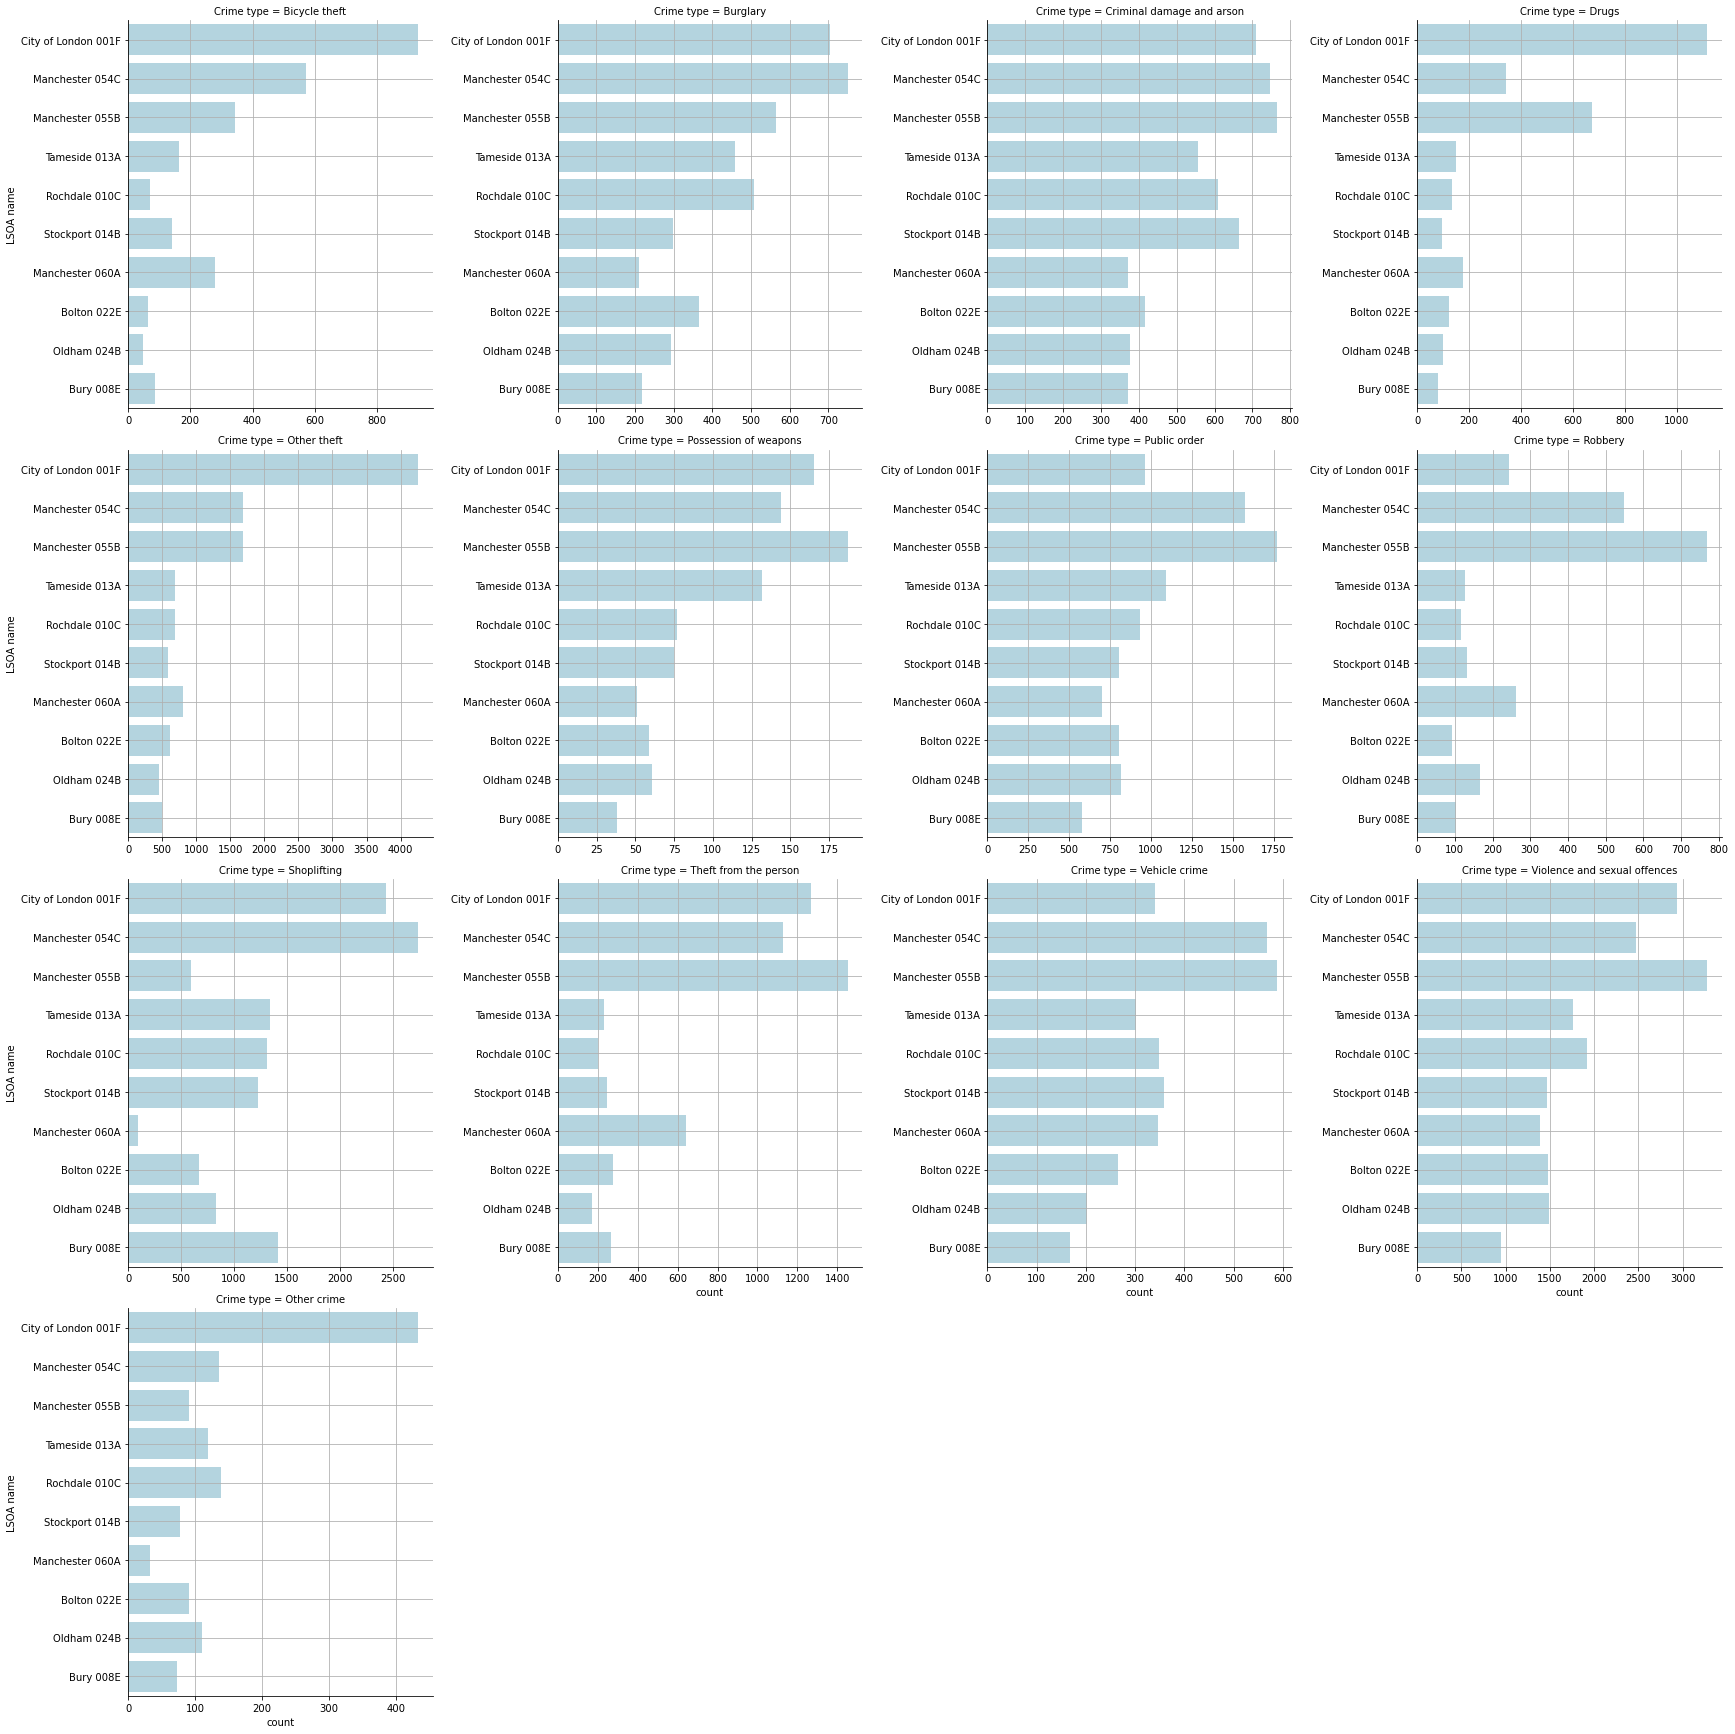

In [78]:
# LSOA name vs Crime Type for the top ten LSOAs
mask = data["LSOA name"].isin(data["LSOA name"].value_counts().head(10).index)
temp = data[mask]

g = sns.catplot(data=temp, y="LSOA name", col="Crime type", col_wrap=4, color="lightblue", order=temp["LSOA name"].value_counts().index,
                sharey=False, sharex=False, kind="count", height=6, dodge=False)
for ax in g.axes.flat:
    ax.grid(True, axis='both')

> Crime types are concentrated in differenet districts

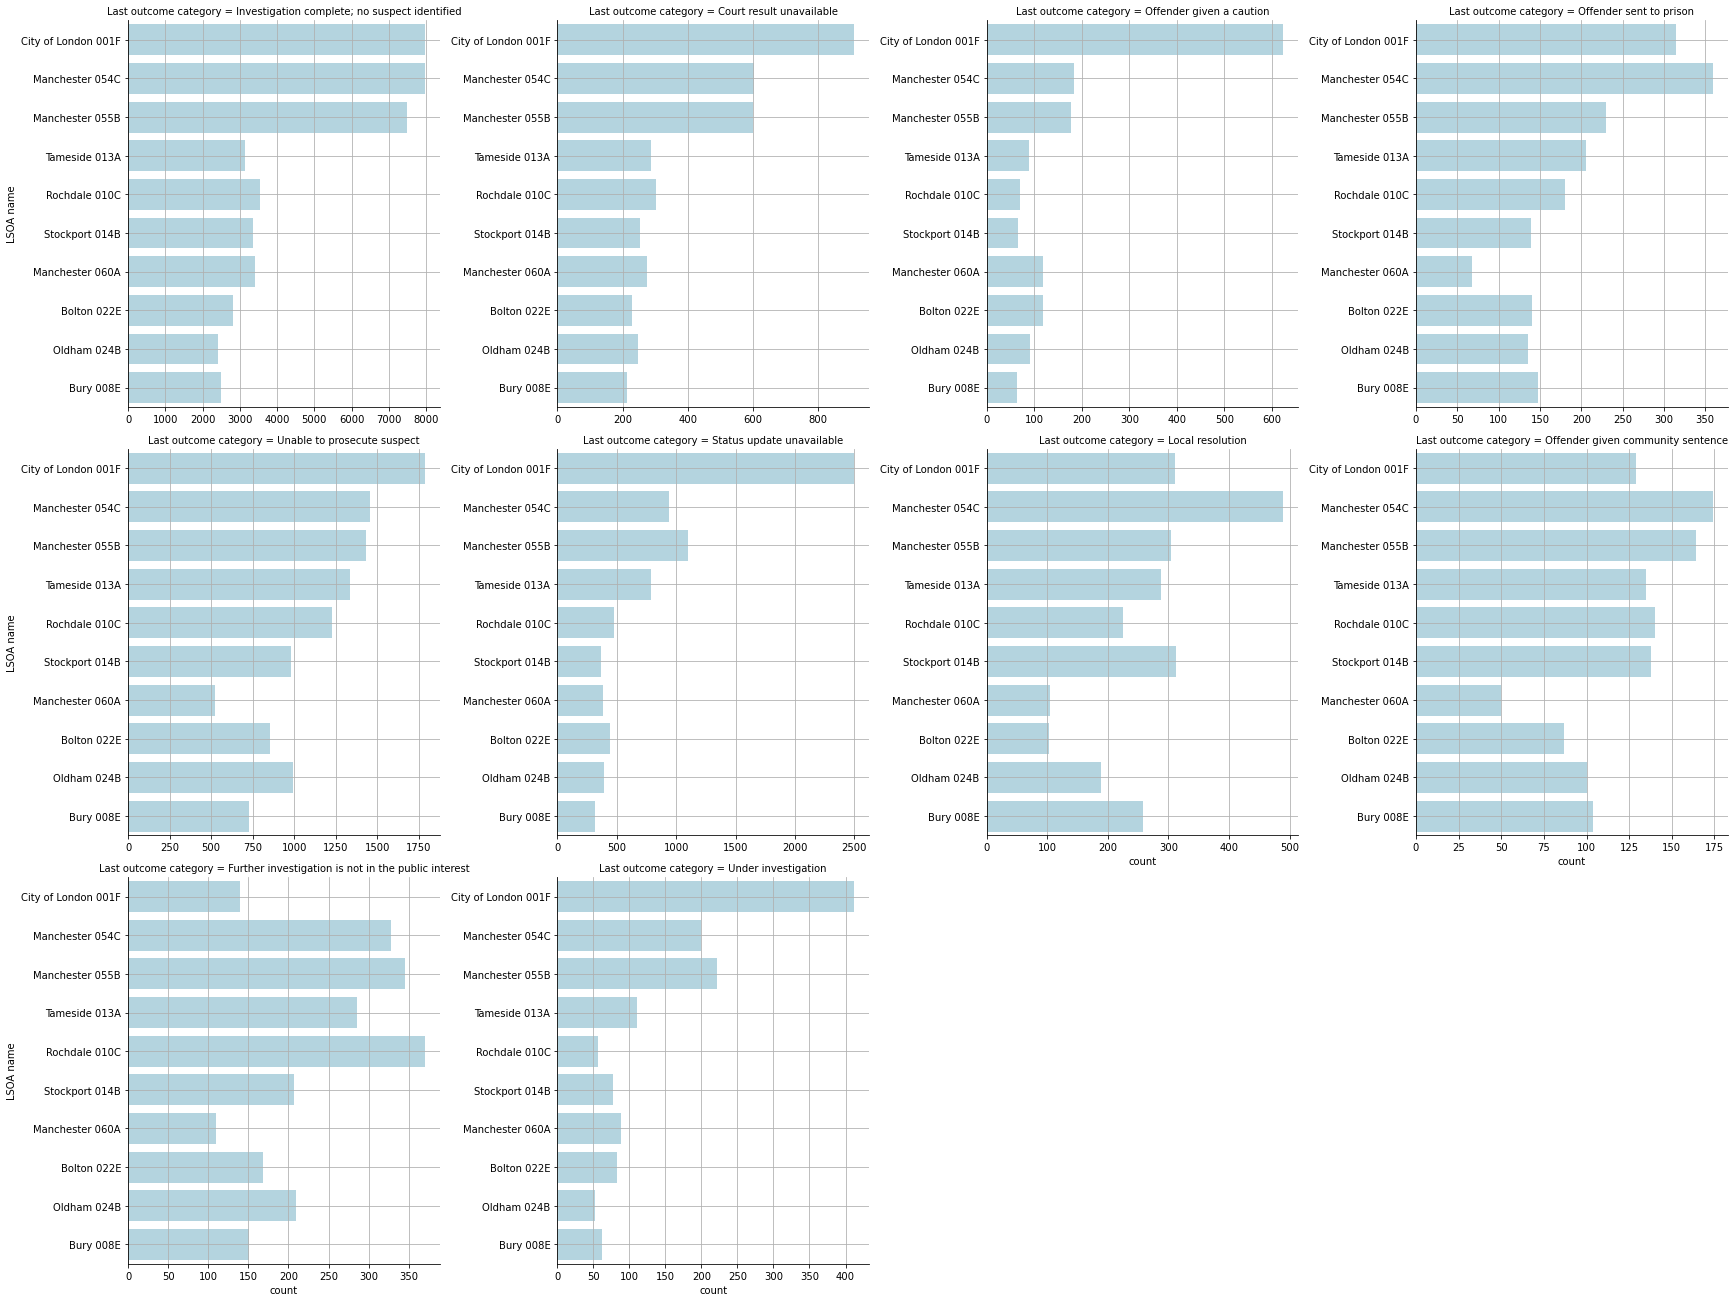

In [79]:
# LSOA name vs Last outcome category for the top ten LSOAs and to ten outcome

top_10_lsoa = data["LSOA name"].value_counts().head(10).index
top_10_outcome = data["Last outcome category"].value_counts().head(10).index

mask = (data["LSOA name"].isin(top_10_lsoa)) & (data["Last outcome category"].isin(top_10_outcome))
temp = data[mask]


g = sns.catplot(data=temp, y="LSOA name", col="Last outcome category", col_wrap=4, color="lightblue", order=temp["LSOA name"].value_counts().index,
                sharey=False, sharex=False, kind="count", height=6, dodge=False)
for ax in g.axes.flat:
    ax.grid(True, axis='both')

<AxesSubplot:xlabel='LSOA name', ylabel='Last outcome category'>

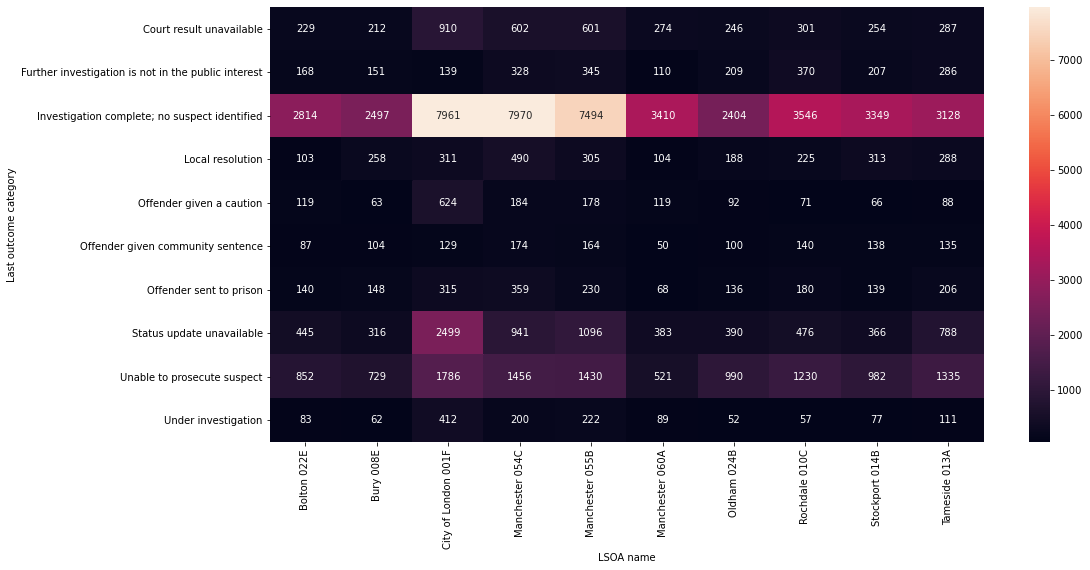

In [80]:
ct_counts = temp.groupby(['LSOA name', 'Last outcome category']).size().reset_index(name="count")
ct_counts = ct_counts.pivot(columns = 'LSOA name', index = 'Last outcome category', values = 'count')
plt.figure(figsize=(16, 8))
sns.heatmap(ct_counts, annot = True, fmt = '')




### Multivariant Analysis

#### I'll focus of the most frequent crime type, which is 'Violence and sexual offences'

In [81]:
mask = data["Crime type"] == "Violence and sexual offences"
vio_data = data[mask].copy()
vio_data.shape

(316180, 9)

In [82]:
vio_data.columns

Index(['Falls within', 'Longitude', 'Latitude', 'Location', 'LSOA name',
       'Crime type', 'Last outcome category', 'year', 'month'],
      dtype='object')

In [83]:
outcome_to_main = {
    "Unable to prosecute suspect": "Pending",
    "Investigation complete; no suspect identified": "Pending",
    "Status update unavailable": "Pending",
    "Court result unavailable": "Pending",
    "Local resolution": "Solved",
    "Further investigation is not in the public interest": "Pending",
    "Under investigation": "Pending",
    "Offender given a caution": "Solved",
    "Offender given community sentence": "Solved",
    "Offender sent to prison": "Solved",
    "Defendant found not guilty": "Solved",
    "Formal action is not in the public interest": "Pending",
    "Awaiting court outcome": "Pending",
    "Offender given suspended prison sentence": "Solved",
    "Offender given conditional discharge": "Solved",
    "Court case unable to proceed": "Pending",
    "Offender fined": "Solved",
    "Offender otherwise dealt with": "Solved",
    "Action to be taken by another organisation": "Solved",
    "Offender given penalty notice": "Solved",
    "Offender ordered to pay compensation": "Solved",
    "Defendant sent to Crown Court": "Solved",
    "Offender given absolute discharge": "Solved",
    "Suspect charged as part of another case": "Solved",
    "Offender given a drugs possession warning": "Solved"
}

vio_data["Outcome main category"] = vio_data["Last outcome category"].map(outcome_to_main)
vio_data["Outcome main category"].value_counts()

Pending    282305
Solved      33875
Name: Outcome main category, dtype: int64

In [84]:
vio_data["Falls within"].value_counts()

Greater Manchester Police    311817
City of London Police          4363
Name: Falls within, dtype: int64

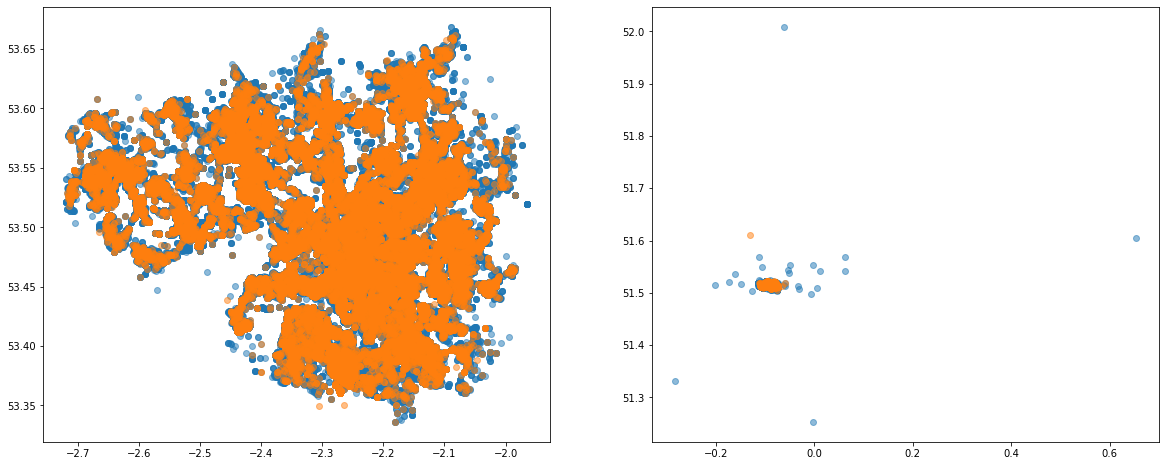

In [85]:
outcomes = ["Pending", "Solved"]

fig, axes = plt.subplots(1, 2, figsize=(20, 8))

for outcome in outcomes:
    mask = (vio_data["Outcome main category"] == outcome) & (vio_data["Falls within"] == "Greater Manchester Police")
    temp = vio_data[mask]
    axes[0].scatter(x=temp["Longitude"], y=temp["Latitude"], alpha=.5)
    
    mask = (vio_data["Outcome main category"] == outcome) & (vio_data["Falls within"] == "City of London Police")
    temp = vio_data[mask]
    axes[1].scatter(x=temp["Longitude"], y=temp["Latitude"], alpha=.5)
    

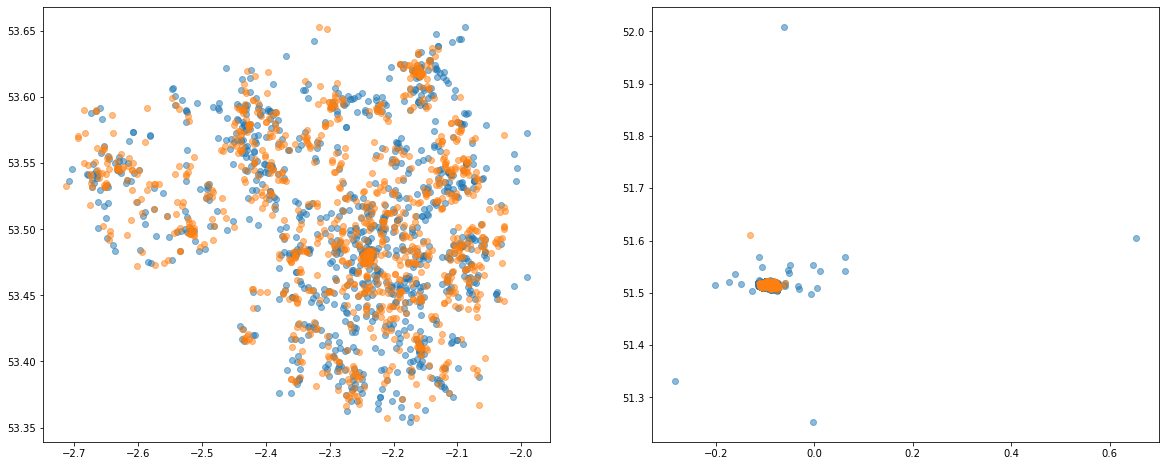

In [86]:
outcomes = ["Pending", "Solved"]

fig, axes = plt.subplots(1, 2, figsize=(20, 8))

for outcome in outcomes:
    mask = (vio_data["Outcome main category"] == outcome) & (vio_data["Falls within"] == "Greater Manchester Police")
    temp = vio_data[mask].sample(1000)
    axes[0].scatter(x=temp["Longitude"], y=temp["Latitude"], alpha=.5)
    
    mask = (vio_data["Outcome main category"] == outcome) & (vio_data["Falls within"] == "City of London Police")
    temp = vio_data[mask]
    axes[1].scatter(x=temp["Longitude"], y=temp["Latitude"], alpha=.5)
    

#### As Manchester has much more crimes than London, I'll focus on Manchester

In [87]:
mask = vio_data["Falls within"] == "Greater Manchester Police"
vio_data = vio_data[mask].copy()
vio_data.shape

(311817, 10)

In [88]:
lat_cats = pd.cut(vio_data["Latitude"], 500, labels=False).astype(int)
lng_cats = pd.cut(vio_data["Longitude"], 500, labels=False).astype(int)


In [89]:
pts_per_bin = vio_data.groupby([lat_cats, lng_cats]).size()
pts_per_bin = pts_per_bin.reset_index().rename(columns={0: "count"})
pts_per_bin["pct"] = pts_per_bin["count"] / pts_per_bin["count"].sum()
pts_per_bin.sort_values("count", ascending=False) 

,Latitude,Longitude,count,pct
9854,211,318,392,0.001257
9951,212,319,367,0.001177
10485,218,319,277,0.000888
19455,313,58,238,0.000763
12077,235,313,229,0.000734
...,...,...,...,...
24787,382,316,1,0.000003
12400,239,46,1,0.000003
12380,238,391,1,0.000003
12367,238,344,1,0.000003


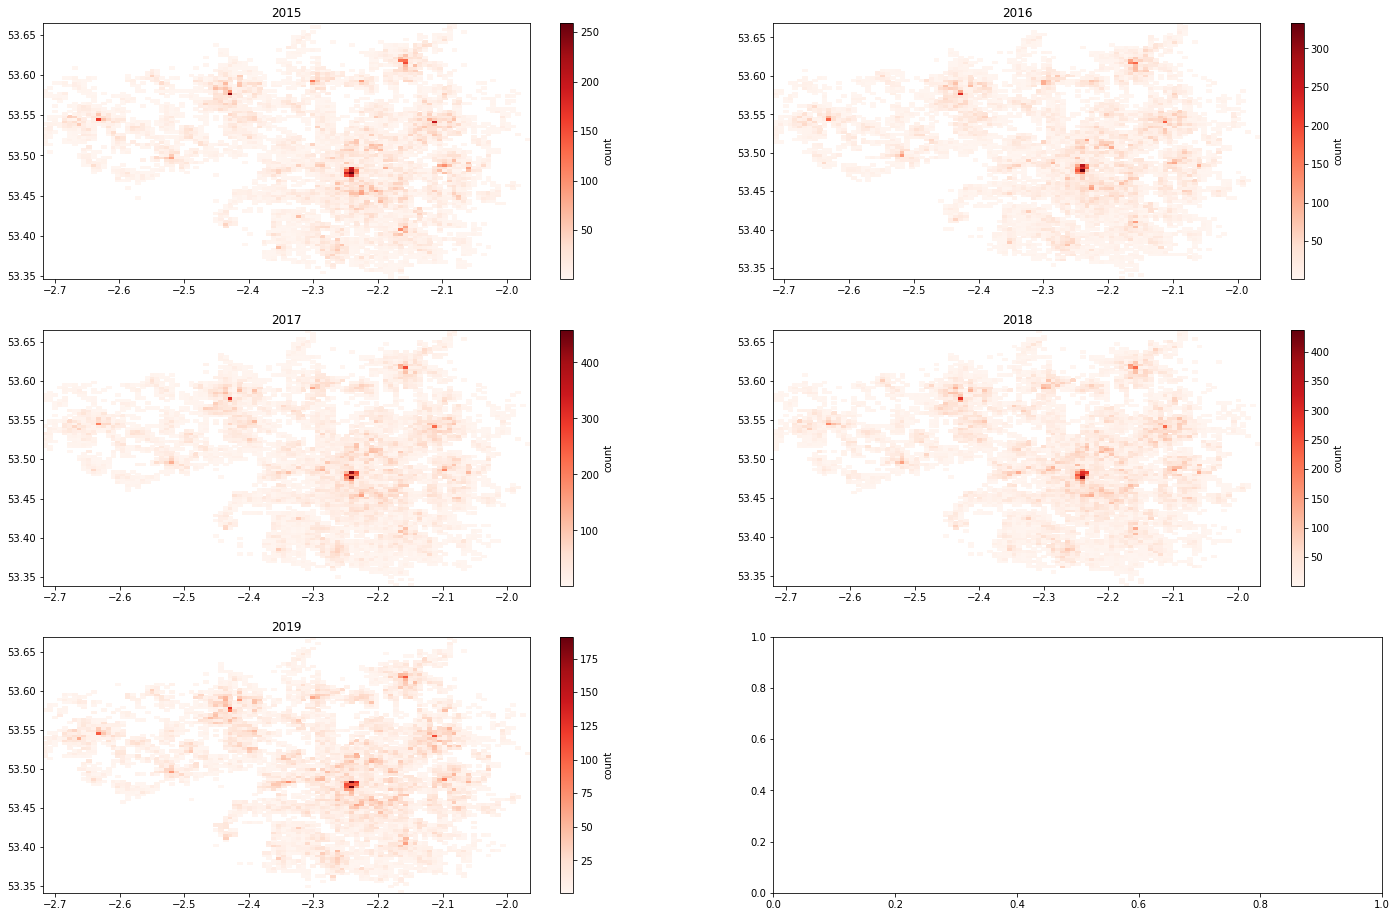

In [90]:
fig, axes = plt.subplots(3, 2, figsize=(24, 16))
axes = axes.flatten()

for i, year in enumerate(range(2015, 2020)):
    mask = vio_data["year"] == year
    temp = vio_data[mask]
    h = axes[i].hist2d(temp["Longitude"], temp["Latitude"], bins=100, cmap="Reds", cmin=1)
#     plt.colorbar(label = 'count')
    axes[i].set_title(f"{year}")

    fig.colorbar(h[3], label = 'count', ax=axes[i])

> Sound like there are crime concentration at some places and it increases by years except for 2019 

<AxesSubplot:xlabel='month', ylabel='count'>

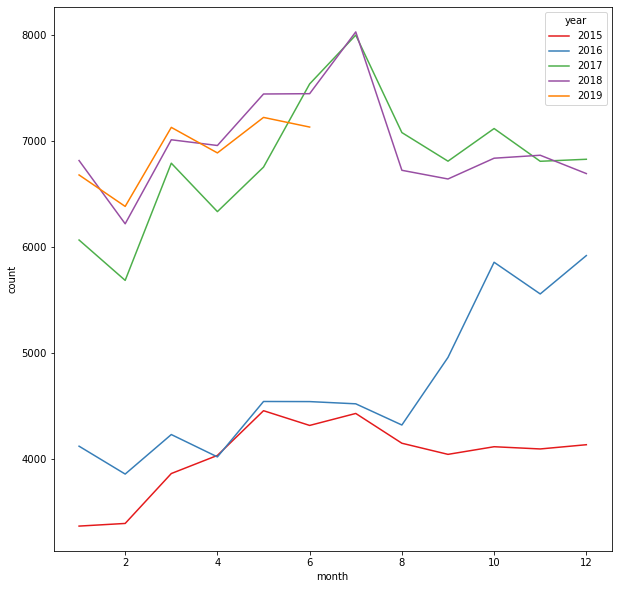

In [91]:
fig = plt.figure(figsize=(10, 10))
axes = fig.add_subplot()

temp = vio_data.groupby(["year", "month"]).size().reset_index().rename(columns={0: "count"})

sns.lineplot(x=temp["month"], y=temp["count"], hue=temp["year"], palette="Set1")

> In general there is increasing in the number of crimes over the years, and some of 2019 data is missing

### More Scientific Analysis (Lorenz Curve)

In [92]:
# find the frequency of crimes for each coordinate point
df_point_freq = vio_data.groupby(["Longitude", "Latitude"], as_index=False) \
                        .size() \
                        .sort_values("size", ascending=False) \
                        .reset_index(drop=True)
df_point_freq

,Longitude,Latitude,size
0,-2.236341,53.481250,277
1,-2.246337,53.492717,229
2,-2.320032,53.489343,223
3,-2.425573,53.576147,219
4,-2.302093,53.514251,216
...,...,...,...
34535,-2.214007,53.367021,1
34536,-2.214051,53.393834,1
34537,-2.355166,53.377848,1
34538,-2.355158,53.447168,1


In [93]:
# calculate the cumulative percentage of each point #crimes to the total #crimes
df_point_freq["crimes_cum_pct"] = df_point_freq["size"].cumsum() / df_point_freq["size"].sum() * 100
# calculate the cumulative percentage of each point to the total #points
df_point_freq["places_cum_pct"] = df_point_freq["size"].notnull().cumsum() / df_point_freq["size"].count() * 100

df_point_freq

,Longitude,Latitude,size,crimes_cum_pct,places_cum_pct
0,-2.236341,53.481250,277,0.088834,0.002895
1,-2.246337,53.492717,229,0.162275,0.005790
2,-2.320032,53.489343,223,0.233791,0.008686
3,-2.425573,53.576147,219,0.304024,0.011581
4,-2.302093,53.514251,216,0.373296,0.014476
...,...,...,...,...,...
34535,-2.214007,53.367021,1,99.998717,99.988419
34536,-2.214051,53.393834,1,99.999038,99.991314
34537,-2.355166,53.377848,1,99.999359,99.994210
34538,-2.355158,53.447168,1,99.999679,99.997105


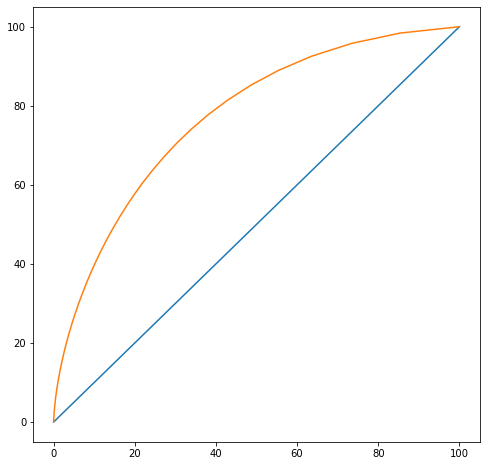

In [94]:
plt.figure(figsize=(8, 8))
plt.plot([0, 100], [0, 100]) # if each place have the same number of crimes
plt.plot(df_point_freq["places_cum_pct"], df_point_freq["crimes_cum_pct"])
